#Imports

In [76]:
#Common Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
#Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

#Data Processing

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [34]:
first_img = x_train[0]
first_lbl = y_train[0]

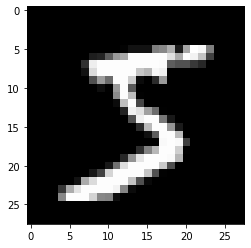

In [42]:
plt.imshow(first_img, cmap='gray')

plt.show()

In [36]:
first_lbl

5

In [38]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [41]:
x_train.shape

(60000, 28, 28, 1)

In [43]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#Deep Learning Model

In [45]:
input_shape = (28, 28, 1)

In [46]:
model = Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),# to avoid overfitting
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [47]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [51]:
result = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 145s 308ms/step - loss: 0.1311 - accuracy: 0.9611
Epoch 2/5
469/469 [==============================] - 143s 305ms/step - loss: 0.0876 - accuracy: 0.9735
Epoch 3/5
469/469 [==============================] - 148s 315ms/step - loss: 0.0734 - accuracy: 0.9773
Epoch 4/5
469/469 [==============================] - 97s 206ms/step - loss: 0.0620 - accuracy: 0.9808
Epoch 5/5
469/469 [==============================] - 153s 326ms/step - loss: 0.0566 - accuracy: 0.9829


#Evaluation

In [55]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f"Test accuracy:{(score[1] * 100):.2f}%")

Test accuracy:98.83%


In [56]:
y_predicted = model.predict(x_test)

In [58]:
y_predicted_org = np.argmax(y_predicted, axis=1)

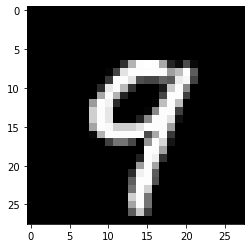

In [74]:
plt.imshow(x_test[12].reshape((28, 28)), cmap='gray')

plt.show()

In [75]:
np.argmax(y_test, axis=1)[12]
#Everything is working pretty good

9

#Test on personal image-2

In [136]:
image = cv2.imread('/content/number_two.jpg') 

In [137]:
norm_img = image.astype("float32") / 255

In [138]:
norm_img_chn = norm_img[:, : ,0]

In [139]:
res_img = cv2.resize(norm_img_chn, (28, 28))

In [140]:
final_img = np.expand_dims(res_img, -1)

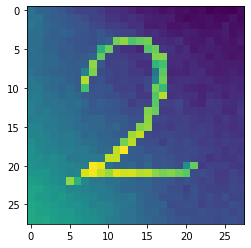

In [141]:
plt.imshow(final_img[:,:,0])

plt.show()

In [142]:
final_img = np.array([final_img])

In [143]:
res = model.predict(final_img)

np.argmax(res)

2

#Test on personal image-6

In [144]:
image = cv2.imread('/content/number_six.jpg') 

In [145]:
norm_img = image.astype("float32") / 255

In [146]:
norm_img_chn = norm_img[:, : ,0]

In [147]:
res_img = cv2.resize(norm_img_chn, (28, 28))

In [148]:
final_img = np.expand_dims(res_img, -1)

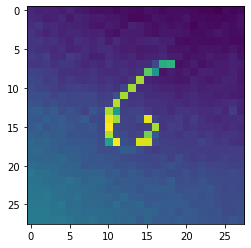

In [149]:
plt.imshow(final_img[:,:,0])

plt.show()

In [150]:
final_img = np.array([final_img])

In [151]:
res = model.predict(final_img)

np.argmax(res)

6